In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
athletes = pd.read_csv('athlete_events.csv')
regions = pd.read_csv('noc_regions.csv')

In [3]:
athletes.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
regions.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [5]:
# Joining the dataframes on basis of NOC
athletes_df = athletes.merge(regions, how='left', on = 'NOC')
athletes_df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN,Poland,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN,Poland,NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN,Poland,NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN,Poland,NaN


In [6]:
athletes_df.drop_duplicates(inplace=True)

In [7]:
athletes_df.shape

(269731, 17)

In [8]:
# Making column names consistent
athletes_df.rename(columns={'region': 'Region', 'notes': 'Notes'}, inplace=True)

In [9]:
athletes_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [10]:
athletes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269731 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      269731 non-null  int64  
 1   Name    269731 non-null  object 
 2   Sex     269731 non-null  object 
 3   Age     260416 non-null  float64
 4   Height  210917 non-null  float64
 5   Weight  208204 non-null  float64
 6   Team    269731 non-null  object 
 7   NOC     269731 non-null  object 
 8   Games   269731 non-null  object 
 9   Year    269731 non-null  int64  
 10  Season  269731 non-null  object 
 11  City    269731 non-null  object 
 12  Sport   269731 non-null  object 
 13  Event   269731 non-null  object 
 14  Medal   39772 non-null   object 
 15  Region  269361 non-null  object 
 16  Notes   5035 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 37.0+ MB


In [11]:
#displaying the basic stats
athletes_df.describe()

,ID,Age,Height,Weight,Year
count,269731.000000,260416.000000,210917.000000,208204.000000,269731.000000
mean,68264.949591,25.454776,175.338953,70.701778,1978.623073
std,39026.253843,6.163869,10.518507,14.349027,29.752055
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34655.500000,21.000000,168.000000,60.000000,1960.000000
50%,68233.000000,24.000000,175.000000,70.000000,1988.000000
75%,102111.000000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [12]:
# Checking null values
nan_values = athletes_df.isna()
nan_columns = nan_values.any()
nan_columns

ID        False
Name      False
Sex       False
Age        True
Height     True
Weight     True
Team      False
NOC       False
Games     False
Year      False
Season    False
City      False
Sport     False
Event     False
Medal      True
Region     True
Notes      True
dtype: bool

In [13]:
#checking the number of missing values
athletes_df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9315
Height     58814
Weight     61527
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     229959
Region       370
Notes     264696
dtype: int64

In [14]:
# Calculate mean of 'Age', 'Height', and 'Weight' columns
mean_age = athletes_df['Age'].mean()
mean_height = athletes_df['Height'].mean()
mean_weight = athletes_df['Weight'].mean()

# Fill missing values in 'Age', 'Height', and 'Weight' columns with their respective means
athletes_df['Age'].fillna(mean_age, inplace=True)
athletes_df['Height'].fillna(mean_height, inplace=True)
athletes_df['Weight'].fillna(mean_weight, inplace=True)

In [15]:
# India details
print(athletes_df.query('Team == "India"').shape)
athletes_df.query('Team == "India"').head()

(1400, 17)


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
505,281,S. Abdul Hamid,M,25.454776,175.338953,70.701778,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 110 metres Hurdles,NaN,India,NaN
506,281,S. Abdul Hamid,M,25.454776,175.338953,70.701778,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 400 metres Hurdles,NaN,India,NaN
895,512,Shiny Kurisingal Abraham-Wilson,F,19.000000,167.000000,53.000000,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 800 metres,NaN,India,NaN
896,512,Shiny Kurisingal Abraham-Wilson,F,19.000000,167.000000,53.000000,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 4 x 400 metres Relay,NaN,India,NaN
897,512,Shiny Kurisingal Abraham-Wilson,F,23.000000,167.000000,53.000000,India,IND,1988 Summer,1988,Summer,Seoul,Athletics,Athletics Women's 800 metres,NaN,India,NaN


In [16]:
print(athletes_df.query('Team == "Japan"').shape)
athletes_df.query('Team == "Japan"').head()

(8269, 17)


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
625,362,Isao Ko Abe,M,24.0,177.0,75.0,Japan,JPN,1936 Summer,1936,Summer,Berlin,Athletics,Athletics Men's Hammer Throw,NaN,Japan,NaN
629,363,Kazumi Abe,M,28.0,178.0,67.0,Japan,JPN,1976 Winter,1976,Winter,Innsbruck,Bobsleigh,Bobsleigh Men's Four,NaN,Japan,NaN
630,364,Kazuo Abe,M,25.0,166.0,69.0,Japan,JPN,1960 Summer,1960,Summer,Roma,Wrestling,"Wrestling Men's Lightweight, Freestyle",NaN,Japan,NaN
631,365,Kinya Abe,M,23.0,168.0,68.0,Japan,JPN,1992 Summer,1992,Summer,Barcelona,Fencing,"Fencing Men's Foil, Individual",NaN,Japan,NaN
632,366,Kiyoshi Abe,M,25.0,167.0,62.0,Japan,JPN,1972 Summer,1972,Summer,Munich,Wrestling,"Wrestling Men's Featherweight, Freestyle",NaN,Japan,NaN


In [17]:
# Top 10 countries participating
top_10_countries = athletes_df.Team.value_counts().sort_values(ascending=False).head(10)
top_10_countries

United States    17598
France           11817
Great Britain    11264
Italy            10213
Germany           9230
Canada            9226
Japan             8269
Sweden            8004
Australia         7512
Hungary           6492
Name: Team, dtype: int64

Highest number of participants are from US

<Axes: title={'center': 'Overall Participation by Country'}, ylabel='Team'>

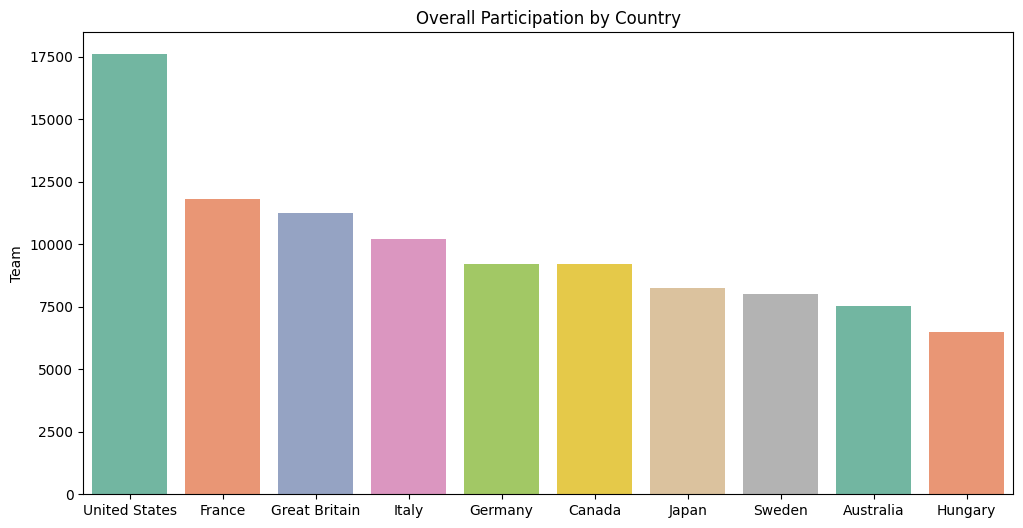

In [18]:
# Ploting top 10 participators
plt.figure(figsize=(12,6))
plt.title("Overall Participation by Country")
sns.barplot(x=top_10_countries.index, y=top_10_countries, palette='Set2')

(array([1.4000e+01, 2.2600e+02, 3.0370e+03, 9.2270e+03, 1.9795e+04,
        3.4417e+04, 4.2667e+04, 5.0714e+04, 3.3662e+04, 2.5459e+04,
        1.7024e+04, 1.1005e+04, 7.0700e+03, 4.4080e+03, 2.9530e+03,
        2.1080e+03, 1.5770e+03, 1.1920e+03, 7.8100e+02, 6.8600e+02,
        4.1400e+02, 3.7200e+02, 2.2300e+02, 1.7400e+02, 1.3200e+02,
        1.1500e+02, 8.1000e+01, 5.4000e+01, 4.4000e+01, 2.8000e+01,
        3.1000e+01, 2.2000e+01, 7.0000e+00, 5.0000e+00]),
 array([10., 12., 14., 16., 18., 20., 22., 24., 26., 28., 30., 32., 34.,
        36., 38., 40., 42., 44., 46., 48., 50., 52., 54., 56., 58., 60.,
        62., 64., 66., 68., 70., 72., 74., 76., 78.]),
 <BarContainer object of 34 artists>)

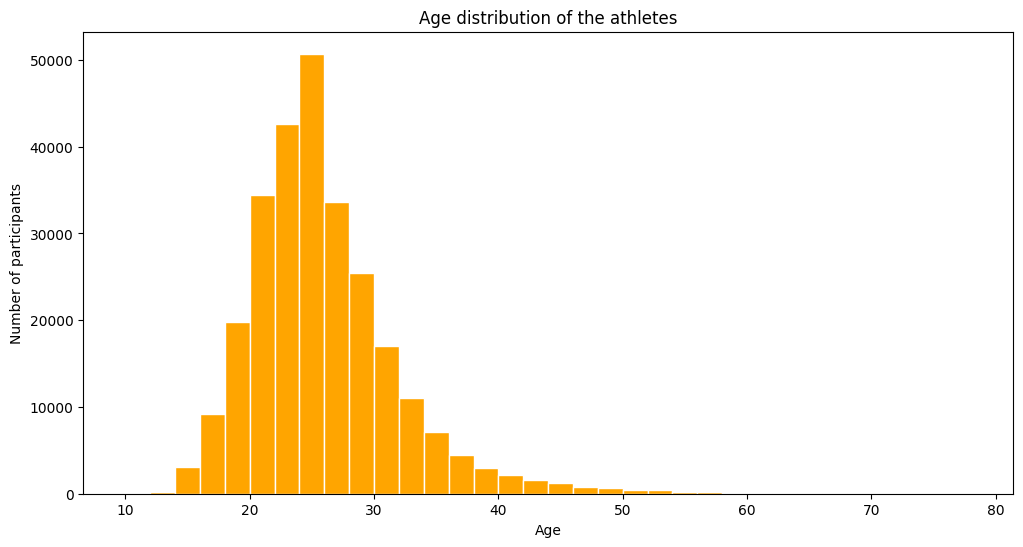

In [19]:
# Age Distribution of the participants
plt.figure(figsize=(12,6))
plt.title("Age distribution of the athletes")
plt.xlabel('Age')
plt.ylabel('Number of participants')
plt.hist(athletes_df.Age, bins=np.arange(10,80,2), color='orange', edgecolor='white')

In [20]:
winter_sports = athletes_df[athletes_df.Season == 'Winter'].Sport.unique()
winter_sports

array(['Speed Skating', 'Cross Country Skiing', 'Ice Hockey', 'Biathlon',
       'Alpine Skiing', 'Luge', 'Bobsleigh', 'Figure Skating',
       'Nordic Combined', 'Freestyle Skiing', 'Ski Jumping', 'Curling',
       'Snowboarding', 'Short Track Speed Skating', 'Skeleton',
       'Military Ski Patrol', 'Alpinism'], dtype=object)

In [21]:
summer_sports = athletes_df[athletes_df.Season == 'Summer'].Sport.unique()
summer_sports

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

In [22]:
# Male and Female participants
gender_counts = athletes_df.Sex.value_counts()
gender_counts

M    195353
F     74378
Name: Sex, dtype: int64

([<matplotlib.patches.Wedge at 0x16baf3850>,
 [Text(-0.83812477758681, -0.7124232289833483, 'M'),
  Text(0.8381247775868104, 0.7124232289833479, 'F')],
 [Text(-0.45715896959280544, -0.38859448853637174, '72.4%'),
  Text(0.4571589695928056, 0.3885944885363715, '27.6%')])

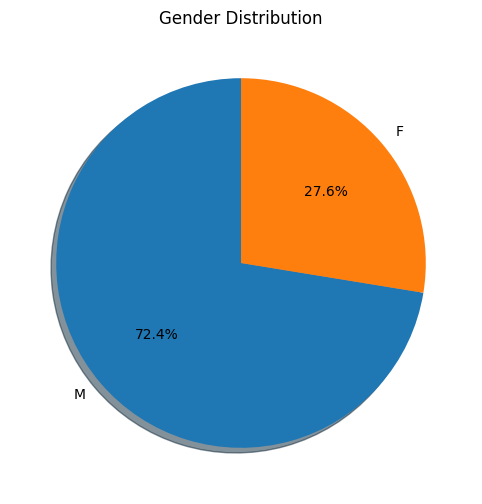

In [23]:
# pie plot for male and female athletes
plt.figure(figsize=(12,6))
plt.title('Gender Distribution')
plt.pie(gender_counts, labels = gender_counts.index, autopct='%.1f%%', startangle=90, shadow=True)

In [24]:
# Total medals
athletes_df.Medal.value_counts()

Gold      13369
Bronze    13295
Silver    13108
Name: Medal, dtype: int64

In [25]:
# Total number of female athletes in each olympics
female_participants = athletes_df[(athletes_df.Sex=='F')&(athletes_df.Season=='Summer')][['Sex', 'Year']]
female_participants = female_participants.groupby('Year').count().reset_index()
female_participants.tail()

,Year,Sex
23,2000,5431
24,2004,5546
25,2008,5816
26,2012,5815
27,2016,6223


Text(0.5, 1.0, 'Women Participation')

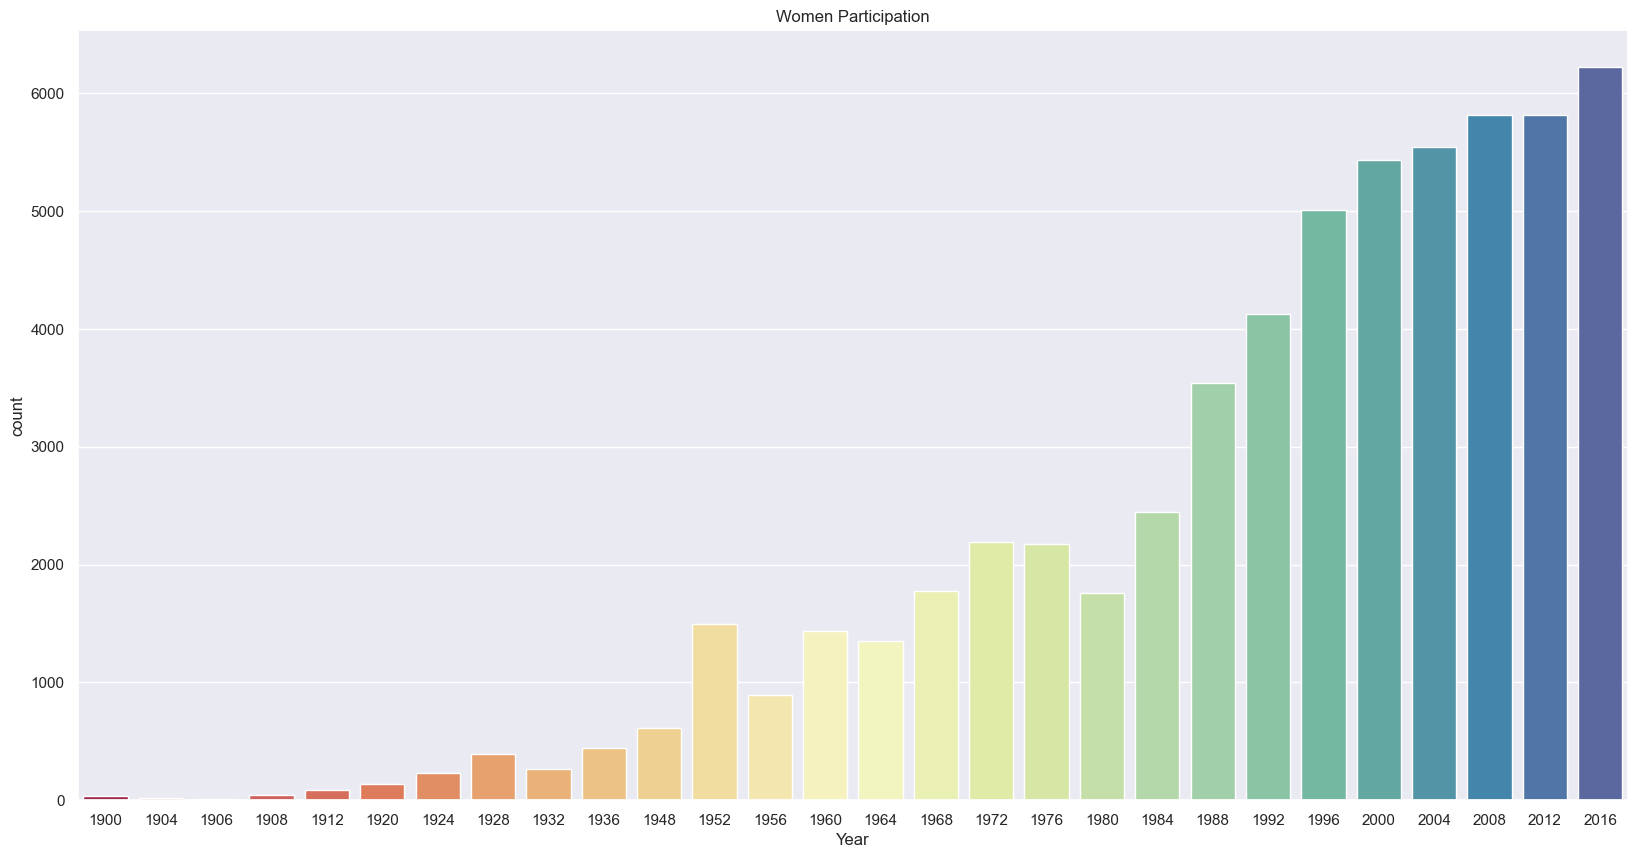

In [26]:
sns.set(style='darkgrid')
plt.figure(figsize=(20,10))
womenOlympics = athletes_df[(athletes_df.Sex == 'F')&(athletes_df.Season=='Summer')]
sns.countplot(x='Year',data=womenOlympics, palette="Spectral")
plt.title('Women Participation')

Text(0.5, 1.0, 'Plot of Female Athletes over time')

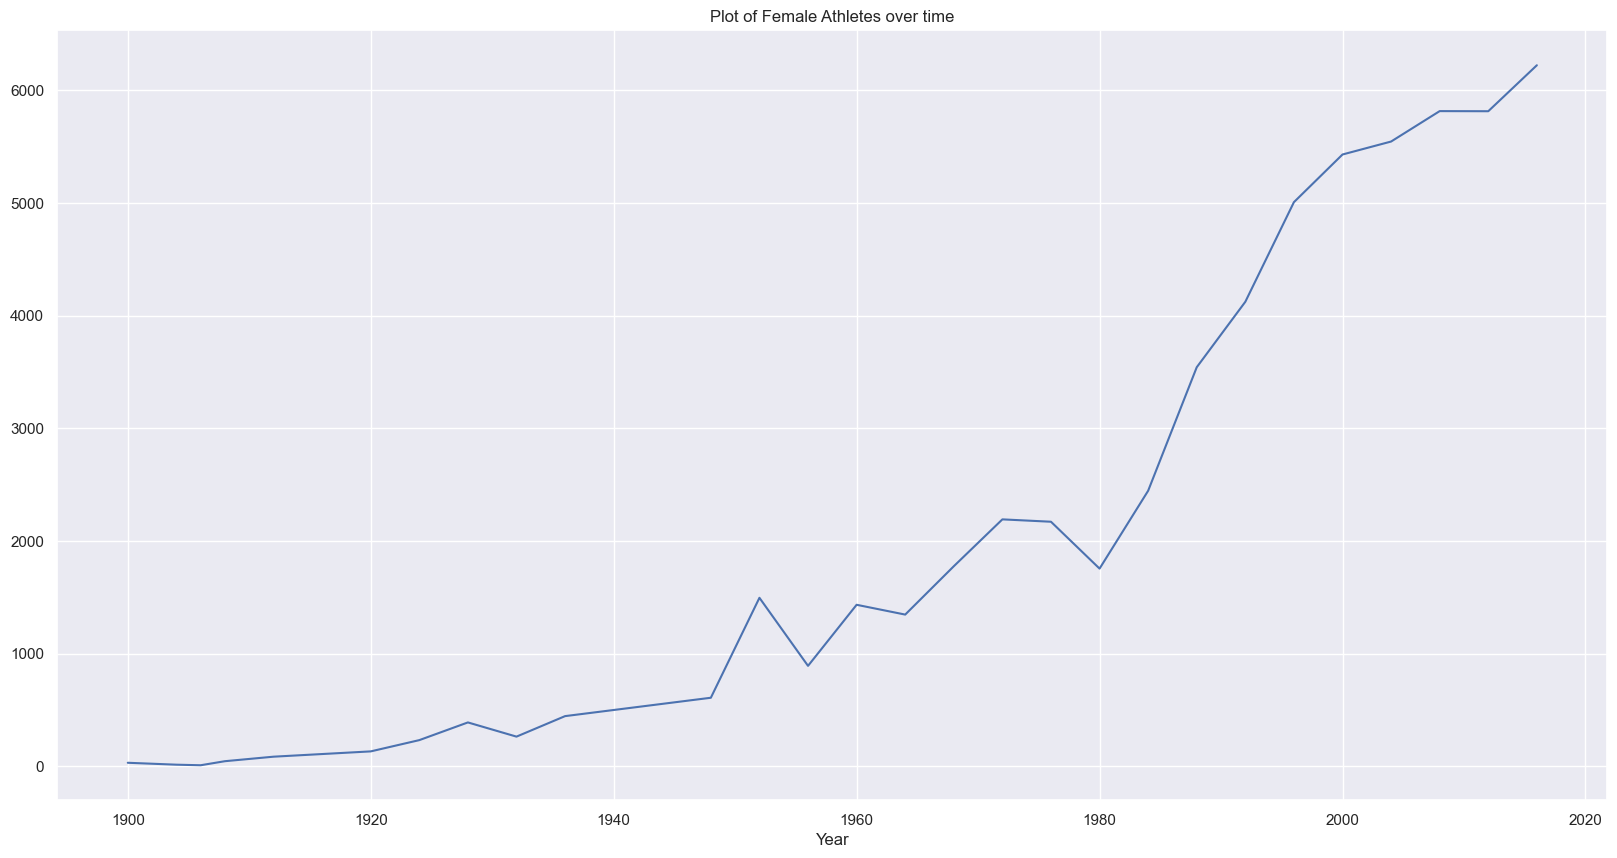

In [27]:
part = womenOlympics.groupby('Year')['Sex'].value_counts()
plt.figure(figsize=(20,10))
part.loc[:,'F'].plot()
plt.title('Plot of Female Athletes over time')

In [28]:
# Gold medal athletes

goldMedals = athletes_df[(athletes_df.Medal == 'Gold')]
goldMedals.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
3,4,Edgar Lindenau Aabye,M,34.0,175.338953,70.701778,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
42,17,Paavo Johannes Aaltonen,M,28.0,175.000000,64.000000,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN
44,17,Paavo Johannes Aaltonen,M,28.0,175.000000,64.000000,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN
48,17,Paavo Johannes Aaltonen,M,28.0,175.000000,64.000000,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,NaN
60,20,Kjetil Andr Aamodt,M,20.0,176.000000,85.000000,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN


In [29]:
# taking values different from NaN
goldMedals = goldMedals[np.isfinite(goldMedals['Age'])]

In [30]:
# Gold beyond 60
goldMedals['ID'][goldMedals['Age'] > 60 ].count()

6

In [31]:
sporting_event = goldMedals['Sport'][goldMedals['Age'] > 60 ]
sporting_event

104003    Art Competitions
105199               Roque
190952             Archery
226374             Archery
233390            Shooting
261102             Archery
Name: Sport, dtype: object

Text(0.5, 1.0, 'Gold Medals for Athletes over 60 years')

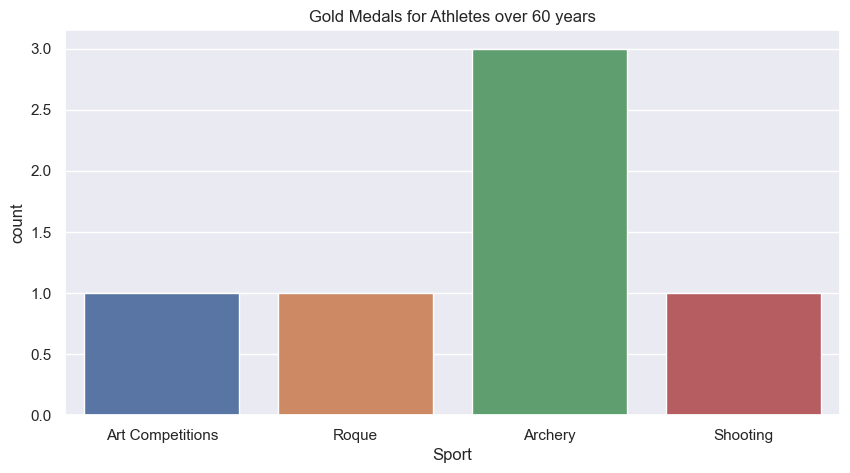

In [32]:
# plot for sporting_event
plt.figure(figsize=(10,5))
plt.tight_layout()
sns.countplot(x=sporting_event.index, data=sporting_event)
plt.title('Gold Medals for Athletes over 60 years')

In [33]:
# Gold medals from each country
gold_medals = athletes_df[athletes_df['Medal'] == 'Gold'].groupby('Region')['Medal'].count().sort_values(ascending=False).reset_index()
gold_medals.head()

,Region,Medal
0,USA,2638
1,Russia,1599
2,Germany,1301
3,UK,677
4,Italy,575


Text(0.5, 1.0, 'Gold Medals per country')

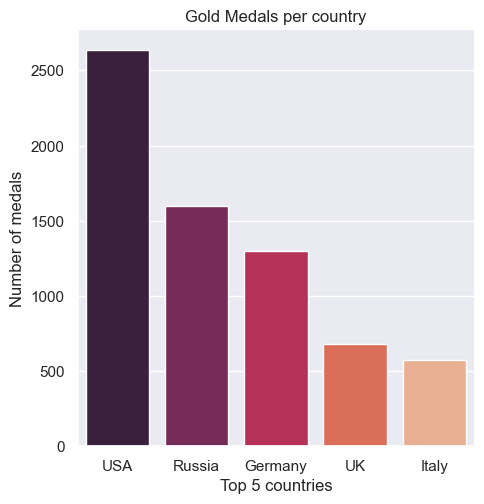

In [34]:
top5_goldMedals = gold_medals.head()
g = sns.catplot(x='Region', y='Medal', data=top5_goldMedals, kind='bar', palette='rocket')
g.set_xlabels("Top 5 countries")
g.set_ylabels('Number of medals')
plt.title("Gold Medals per country")

In [35]:
# Rio Olympics (2016)
max_year = athletes_df.Year.max()
print(max_year)

team_names = athletes_df[(athletes_df.Year == max_year)&(athletes_df.Medal == 'Gold')].Team

team_names.value_counts().head(10)

2016


United States    137
Great Britain     64
Russia            50
Germany           47
China             44
Brazil            34
Australia         23
Argentina         21
France            20
Japan             17
Name: Team, dtype: int64

Text(0.5, 0, 'Countrywise Medals for year 2016')

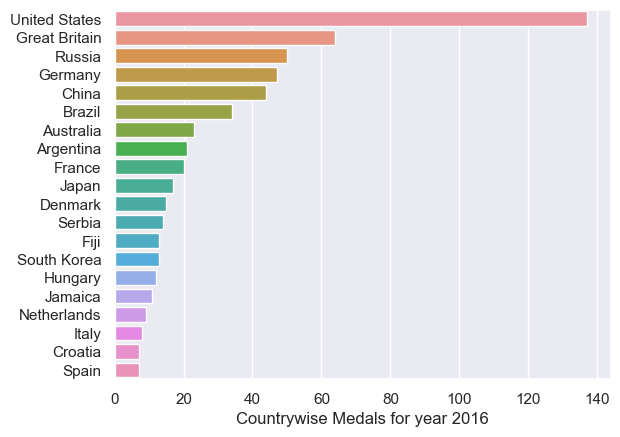

In [36]:
sns.barplot(x=team_names.value_counts().head(20), y=team_names.value_counts().head(20).index)
plt.ylabel(None)
plt.xlabel('Countrywise Medals for year 2016')

In [37]:
not_null_medals = athletes_df[(athletes_df['Height'].notnull()) & (athletes_df['Weight'].notnull())]

Text(0.5, 1.0, 'Height vs Weight of Olympic Medalists')

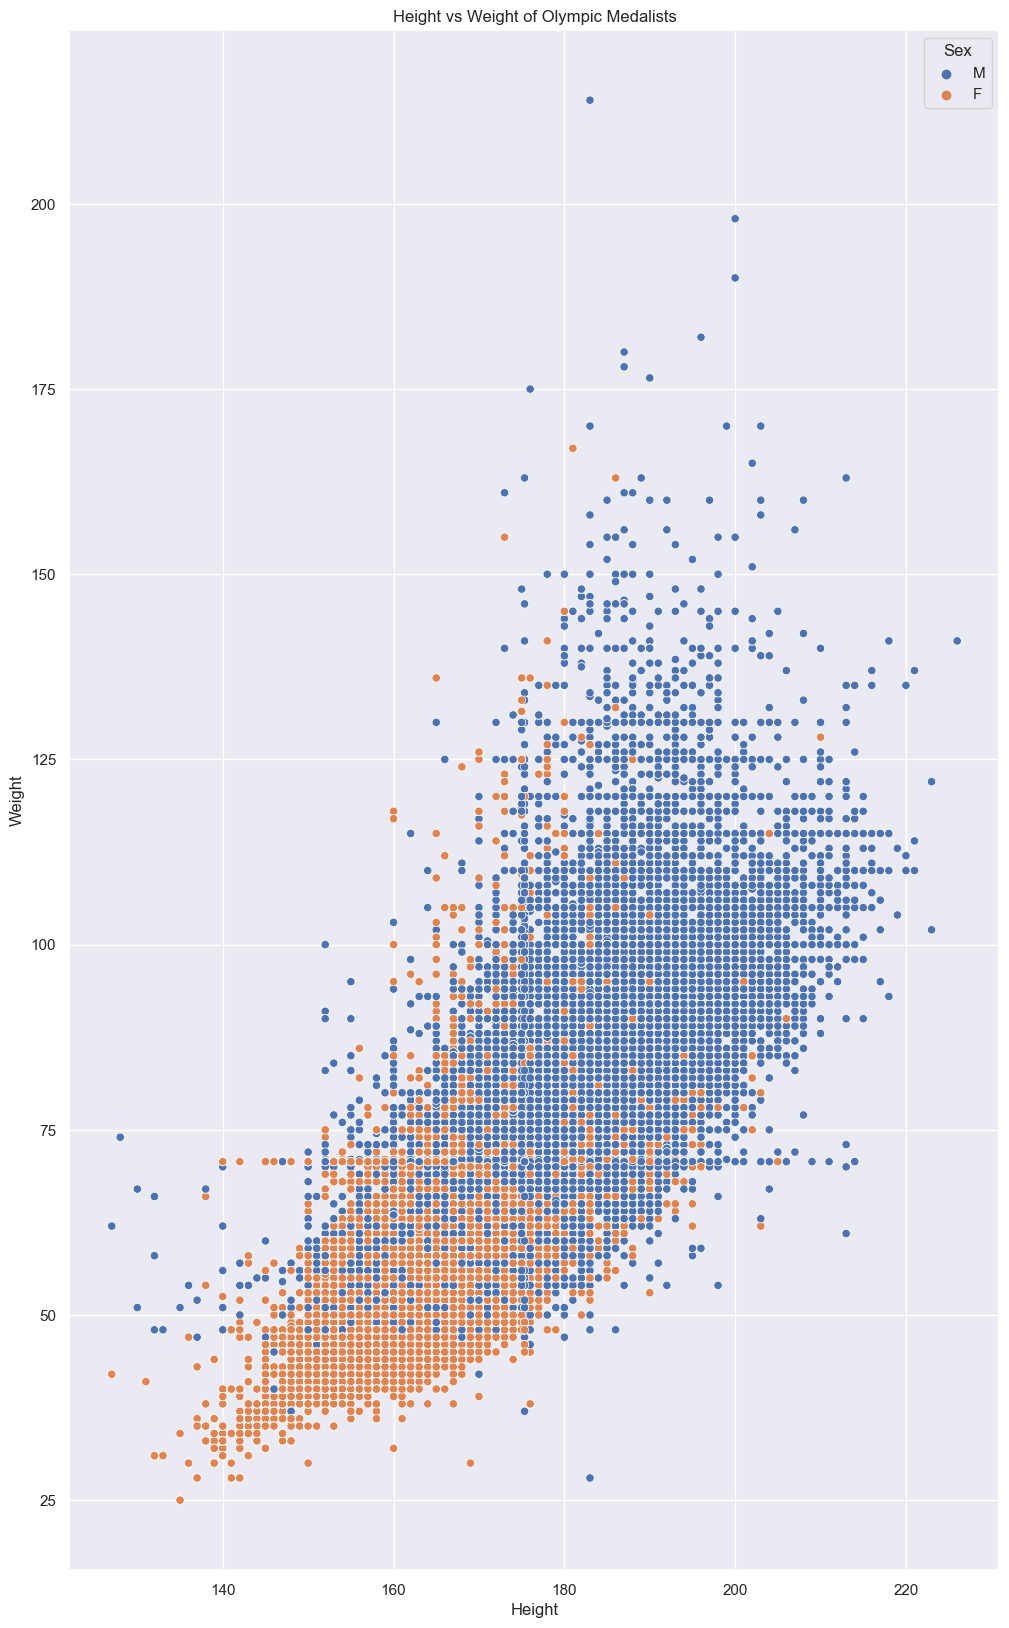

In [38]:
plt.figure(figsize=(12,20))
axis = sns.scatterplot(x='Height', y='Weight', data=not_null_medals, hue='Sex')
plt.title('Height vs Weight of Olympic Medalists')

Does the height of male and female basketball players differ significantly? <br>
To answer this question, we can perform a two-sample t-test to compare the mean height of male and female basketball players

In [40]:
import pandas as pd
from scipy.stats import ttest_ind

# Subset the data to only include basketball players
basketball_df = athletes_df[athletes_df['Sport'] == 'Basketball']

# Split the data into male and female groups
male_heights = basketball_df[basketball_df['Sex'] == 'M']['Height']
female_heights = basketball_df[basketball_df['Sex'] == 'F']['Height']


t, p = ttest_ind(male_heights, female_heights, equal_var=True)
print("p value: ", p)
# Interpret the results
if p < 0.05:
    print('The height of male and female basketball players differs significantly.') #reject null hypothesis
else:
    print('There is no significant difference in the height of male and female basketball players.')


p value:  7.857421906078502e-110
The height of male and female basketball players differs significantly.
